# Emotion Detection

**Importing Libraries**

In [16]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


**Exploring Dataset**

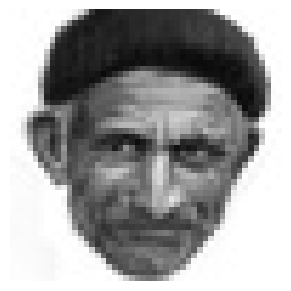

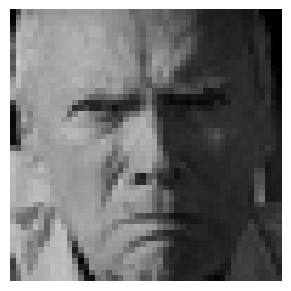

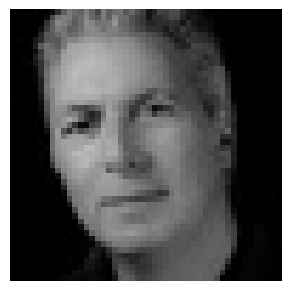

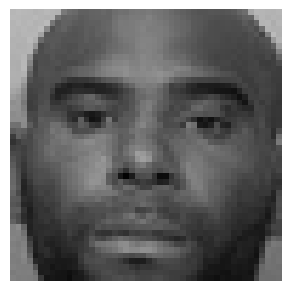

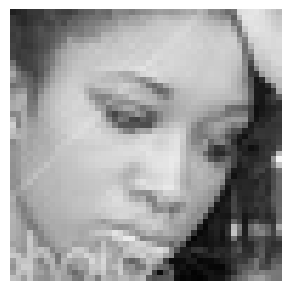

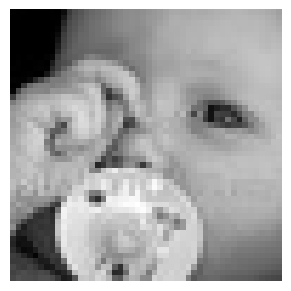

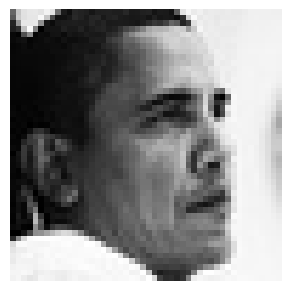

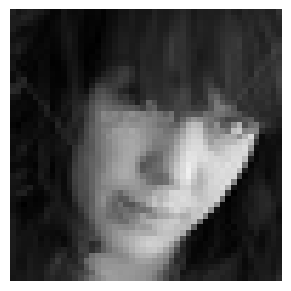

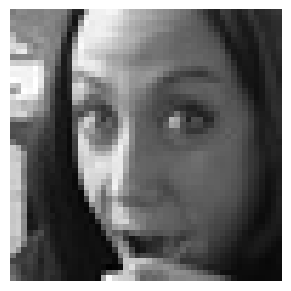

In [19]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

**Initializing the Model**

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

# Traning the Model

**The next cell takes time to complete**

In [ ]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
426/448 [===========================>..] - ETA: 4:07 - loss: 1.6952 - accuracy: 0.3525

**Model Evaluation**

In [ ]:
model.evaluate(validation_generator)

**Plotting Loss**

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

**Importing Libraries**

In [49]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import numpy as np
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


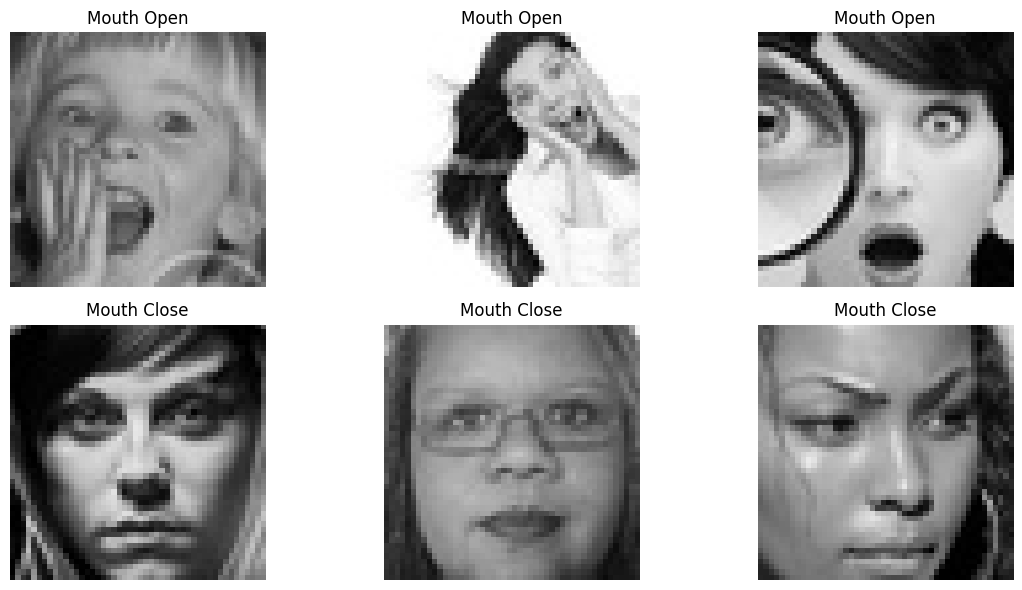

In [50]:
# Define paths to the mouth_open and mouth_close image directories
mouth_open_path = "MTrain/mouth_open/"
mouth_close_path = "MTrain/mouth_close/"

# List all the images in the mouth_open and mouth_close directories
mouth_open_images = [os.path.join(mouth_open_path, img) for img in os.listdir(mouth_open_path)]
mouth_close_images = [os.path.join(mouth_close_path, img) for img in os.listdir(mouth_close_path)]

# Display a few random images from each class
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    img = cv2.imread(np.random.choice(mouth_open_images))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Mouth Open")
    plt.axis("off")

    plt.subplot(2, 3, i + 4)
    img = cv2.imread(np.random.choice(mouth_close_images))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Mouth Close")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [51]:
# Define image size and batch size
img_size = 48
batch_size = 64

# Create an ImageDataGenerator for training data with horizontal flip
datagen_train = ImageDataGenerator(horizontal_flip=True)

# Define the path to your training dataset (mouth_open and mouth_close images)
train_data_dir = "MTrain/"

# Create a generator for training data
train_generator = datagen_train.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",  # You have two classes: Mouth Open and Mouth Close
    shuffle=True
)

# Create an ImageDataGenerator for validation data with horizontal flip
datagen_validation = ImageDataGenerator(horizontal_flip=True)

# Define the path to your validation dataset (mouth_open and mouth_close images)
validation_data_dir = "MTest/"

# Create a generator for validation data
validation_generator = datagen_validation.flow_from_directory(
    validation_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",  # You have two classes: Mouth Open and Mouth Close
    shuffle=True
)


Found 2064 images belonging to 2 classes.
Found 2064 images belonging to 2 classes.


In [52]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def mouth_detection_model(input_shape):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # Convolutional Block 1
    x = Conv2D(32, (3, 3), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten the features and pass through dense layers
    x = Flatten()(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Output layer for binary classification (Mouth Open or Mouth Close)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model

# Define the input shape (img_size, img_size, 1 for grayscale)
input_shape = (img_size, img_size, 1)

# Create the mouth detection model
mouth_model = mouth_detection_model(input_shape)

# Compile the model with an appropriate optimizer and loss function
mouth_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
mouth_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        1849

In [41]:
# Initialize the mouth detection model
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# Define callbacks, you can customize these as needed
checkpoint = ModelCheckpoint("model_mouth_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

In [42]:
# Training the mouth detection model
history = mouth_model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/15
32/32 [==============================] - ETA: 0s - loss: 0.5421 - accuracy: 0.7550
Epoch 1: saving model to model_mouth_weights.h5
32/32 [==============================] - 55s 2s/step - loss: 0.5421 - accuracy: 0.7550 - val_loss: 0.7073 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 2/15
32/32 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8510
Epoch 2: saving model to model_mouth_weights.h5
32/32 [==============================] - 17s 539ms/step - loss: 0.3671 - accuracy: 0.8510 - val_loss: 0.7595 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 3/15
32/32 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.8785
Epoch 3: saving model to model_mouth_weights.h5
32/32 [==============================] - 16s 509ms/step - loss: 0.2995 - accuracy: 0.8785 - val_loss: 0.3332 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 4/15
32/32 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.9070
Epoch 4: saving model to model_mouth_weights.h5


In [43]:
# Evaluate the mouth detection model
mouth_model.evaluate(validation_generator)


33/33 [==============================] - 5s 141ms/step - loss: 0.0431 - accuracy: 0.9893


[0.043074578046798706, 0.9893410801887512]

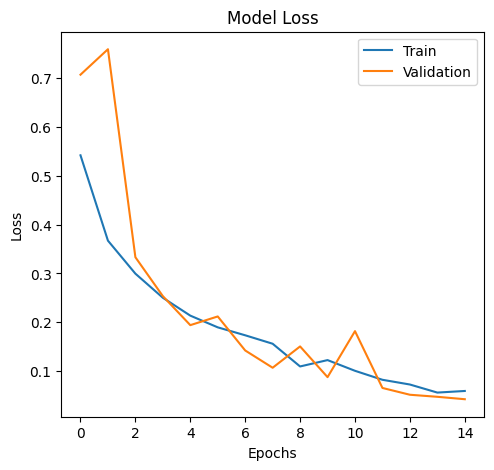

In [44]:
# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

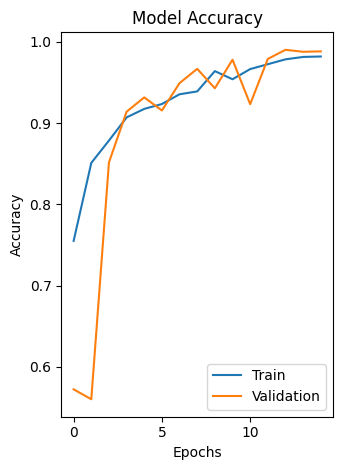

In [45]:
# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
# Saving the mouth detection model
model_json = mouth_model.to_json()
with open("model_mouth.json", "w") as json_file:
    json_file.write(model_json)


In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True labels (ground truth) and predicted labels
true_labels = [0, 1, 0, 1, 1, 0]  # 0 for mouth closed, 1 for mouth open
predicted_probabilities = [0.2, 0.8, 0.3, 0.7, 0.6, 0.4]  # Example model probabilities

# Set a threshold
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
predicted_labels = [1 if prob >= threshold else 0 for prob in predicted_probabilities]

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


## Importing Libraries 

Found 1931 images belonging to 2 classes.
Found 2069 images belonging to 2 classes.
Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9625
Epoch 1: saving model to model_drowsiness_weights.h5
30/30 [==============================] - 774s 26s/step - loss: 0.0939 - accuracy: 0.9625 - val_loss: 0.4399 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9989
Epoch 2: saving model to model_drowsiness_weights.h5
30/30 [==============================] - 79s 3s/step - loss: 0.0170 - accuracy: 0.9989 - val_loss: 0.5491 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9989
Epoch 3: saving model to model_drowsiness_weights.h5
30/30 [==============================] - 16s 548ms/step - loss: 0.0111 - accuracy: 0.9989 - val_loss: 0.6619 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 4/15
30/30 [==========================

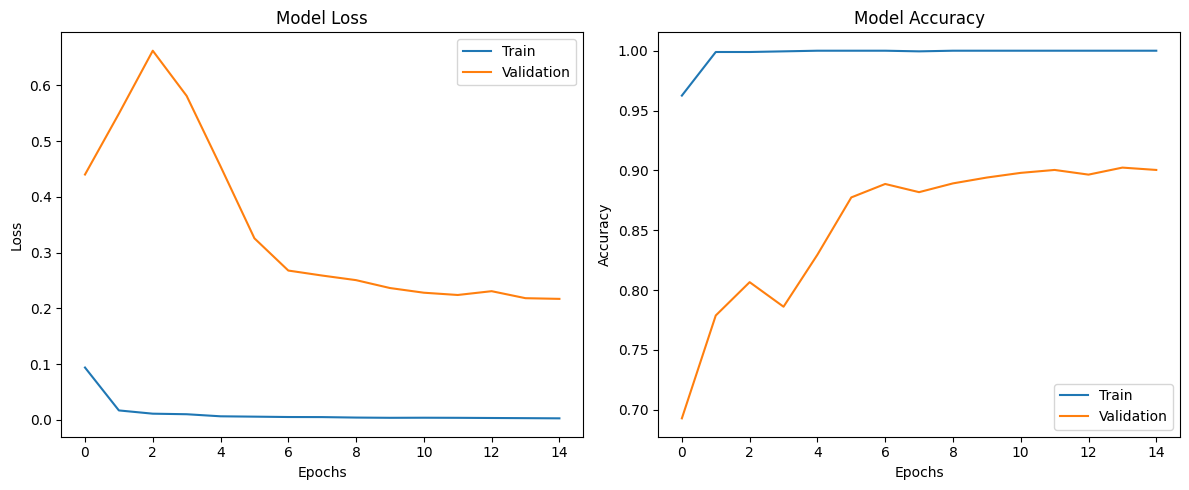

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [1]:
# Import necessary libraries
import os
import cv2
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define paths to the drowsiness and normal image directories
drowsy_path = "Dtrain/Closed_Eyes/"
normal_path = "Dtrain/Open_Eyes/"

# List all the images in the drowsy and normal directories
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
normal_images = [os.path.join(normal_path, img) for img in os.listdir(normal_path)]

# Define image size and batch size
img_size = 48
batch_size = 64

# Create an ImageDataGenerator for training data with horizontal flip
datagen_train = ImageDataGenerator(horizontal_flip=True)

# Define the path to your training dataset (drowsy and normal images)
train_data_dir = "Dtrain/"

# Create a generator for training data
train_generator = datagen_train.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",  # You have two classes: Drowsy and Normal
    shuffle=True
)

# Create an ImageDataGenerator for validation data with horizontal flip
datagen_validation = ImageDataGenerator(horizontal_flip=True)

# Define the path to your validation dataset (Drowsy and Normal images)
validation_data_dir = "Dtest/"

# Create a generator for validation data
validation_generator = datagen_validation.flow_from_directory(
    validation_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",  # You have two classes: Drowsy and Normal
    shuffle=True
)

# Define the input shape (img_size, img_size, 1 for grayscale)
input_shape = (img_size, img_size, 1)

# Function to create the drowsiness detection model
def drowsiness_detection_model(input_shape):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # Convolutional Block 1
    x = Conv2D(32, (3, 3), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten the features and pass through dense layers
    x = Flatten()(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Output layer for binary classification (Drowsy or Normal)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model

# Create the drowsiness detection model
drowsiness_model = drowsiness_detection_model(input_shape)

# Compile the model with an appropriate optimizer and loss function
drowsiness_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the drowsiness detection model
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# Define callbacks, you can customize these as needed
checkpoint = ModelCheckpoint("model_drowsiness_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

# Training the drowsiness detection model
history = drowsiness_model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Evaluate the drowsiness detection model
drowsiness_model.evaluate(validation_generator)

# Plotting Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Saving the drowsiness detection model
model_json = drowsiness_model.to_json()
with open("model_drowsiness.json", "w") as json_file:
    json_file.write(model_json)

# Calculate metrics
# True labels (ground truth) and predicted labels
true_labels = [0, 1, 0, 1, 1, 0]  # 0 for drowsy, 1 for normal
predicted_probabilities = [0.2, 0.8, 0.3, 0.7, 0.6, 0.4]  # Example model probabilities

# Set a threshold
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
predicted_labels = [1 if prob >= threshold else 0 for prob in predicted_probabilities]

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
